In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance['sex'], insurance['age']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [3]:
# Let's try one-hot encode our df so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create x, y values
x = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [5]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [6]:
# Create training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [7]:
model_2 = tf.keras.models.load_model('best_model_HDF5_format.h5')
model_2.summary()

Metal device set to: Apple M1
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


2022-08-20 20:27:05.281973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-20 20:27:05.282276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
# Bulid a NN
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics=['mae'])

insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100


2022-08-20 20:27:05.456375: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-20 20:27:05.618991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 7ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7764 - mae: 7886.7764
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3882 - mae: 7748.3882
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7698.5596 - mae: 7698.5596
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7496.7783 - mae: 7496.7783
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1748 - mae: 7493.1748
Epoch 11/10

34/34 [==============================] - 0s 3ms/step - loss: 7176.5215 - mae: 7176.5215
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 7425.6289 - mae: 7425.6289
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 7403.1299 - mae: 7403.1299
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 7356.0078 - mae: 7356.0078
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 7484.7280 - mae: 7484.7280
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 7217.6074 - mae: 7217.6074
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 7260.9995 - mae: 7260.9995
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7134.1558 - mae: 7134.1558
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 7083.4360 - mae: 7083.4360
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 7254.1777 - mae: 7254.1777
Epo

In [9]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7023.3315 - mae: 7023.3311


2022-08-20 20:27:18.030371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[7023.33154296875, 7023.3310546875]

In [10]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Try 2 experiments

    1. add an extra layer with more hidden units and use the Adam optimizer
    2. train for longer

In [11]:
# Add an extra layer with more hidden laters
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

insurance_model_2.fit(x_train, y_train, epochs = 100)

Epoch 1/100


2022-08-20 20:27:18.295715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 14ms/step - loss: 13273.1592 - mae: 13273.1592
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12749.5439 - mae: 12749.5439
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12055.7588 - mae: 12055.7588
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8301 - mae: 10905.8301
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9457.7471 - mae: 9457.7471
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8147.6812 - mae: 8147.6812
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8521 - mae: 7528.8521
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7429.1553 - mae: 7429.1553
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae: 7409.0811


34/34 [==============================] - 0s 5ms/step - loss: 5834.5522 - mae: 5834.5522
Epoch 83/100
34/34 [==============================] - 0s 5ms/step - loss: 5806.0972 - mae: 5806.0972
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 5772.6836 - mae: 5772.6836
Epoch 85/100
34/34 [==============================] - 0s 6ms/step - loss: 5745.8125 - mae: 5745.8125
Epoch 86/100
34/34 [==============================] - 0s 5ms/step - loss: 5711.3252 - mae: 5711.3252
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 5674.9575 - mae: 5674.9575
Epoch 88/100
34/34 [==============================] - 0s 5ms/step - loss: 5640.4956 - mae: 5640.4956
Epoch 89/100
34/34 [==============================] - 0s 5ms/step - loss: 5601.1719 - mae: 5601.1719
Epoch 90/100
34/34 [==============================] - 0s 5ms/step - loss: 5559.8877 - mae: 5559.8877
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 5523.3740 - mae: 5523.3740
Epo

In [12]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 16ms/step - loss: 4924.3413 - mae: 4924.3413


2022-08-20 20:27:34.728174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[4924.34130859375, 4924.34130859375]

In [13]:
# Train for longer
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mse'])

history = insurance_model_3.fit(x_train, y_train, epochs = 200)
# What is history?

Epoch 1/200
22/34 [==================>...........] - ETA: 0s - loss: 13371.6338 - mse: 322974944.0000

2022-08-20 20:27:35.102504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 5ms/step - loss: 13273.1592 - mse: 320363008.0000
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13104.4297 - mse: 315575840.0000
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12749.5439 - mse: 305783360.0000
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 12055.7588 - mse: 287498464.0000
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10905.8301 - mse: 259018560.0000
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 9457.7471 - mse: 222532192.0000
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 8147.6812 - mse: 186940016.0000
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 7528.8521 - mse: 162905808.0000
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1553 - mse: 155103072.0000
Epoch 10/200
34/34 [==============================] - 0s 4ms/s

34/34 [==============================] - 0s 4ms/step - loss: 5940.2163 - mse: 137018400.0000
Epoch 79/200
34/34 [==============================] - 0s 4ms/step - loss: 5915.5830 - mse: 135777888.0000
Epoch 80/200
34/34 [==============================] - 0s 4ms/step - loss: 5888.4727 - mse: 135225888.0000
Epoch 81/200
34/34 [==============================] - 0s 4ms/step - loss: 5861.9058 - mse: 133977464.0000
Epoch 82/200
34/34 [==============================] - 0s 4ms/step - loss: 5834.5522 - mse: 132315816.0000
Epoch 83/200
34/34 [==============================] - 0s 4ms/step - loss: 5806.0972 - mse: 131362144.0000
Epoch 84/200
34/34 [==============================] - 0s 4ms/step - loss: 5772.6836 - mse: 130027448.0000
Epoch 85/200
34/34 [==============================] - 0s 4ms/step - loss: 5745.8125 - mse: 128408576.0000
Epoch 86/200
34/34 [==============================] - 0s 4ms/step - loss: 5711.3252 - mse: 127739144.0000
Epoch 87/200
34/34 [==============================] - 0s 4m

34/34 [==============================] - 0s 4ms/step - loss: 3740.2710 - mse: 52816692.0000
Epoch 156/200
34/34 [==============================] - 0s 4ms/step - loss: 3735.1860 - mse: 52929904.0000
Epoch 157/200
34/34 [==============================] - 0s 4ms/step - loss: 3733.5391 - mse: 52922360.0000
Epoch 158/200
34/34 [==============================] - 0s 4ms/step - loss: 3729.3281 - mse: 52598868.0000
Epoch 159/200
34/34 [==============================] - 0s 4ms/step - loss: 3727.9929 - mse: 52806756.0000
Epoch 160/200
34/34 [==============================] - 0s 4ms/step - loss: 3733.1047 - mse: 52450904.0000
Epoch 161/200
34/34 [==============================] - 0s 4ms/step - loss: 3728.3860 - mse: 51919460.0000
Epoch 162/200
34/34 [==============================] - 0s 5ms/step - loss: 3725.8069 - mse: 52340940.0000
Epoch 163/200
34/34 [==============================] - 0s 4ms/step - loss: 3722.9839 - mse: 52221724.0000
Epoch 164/200
34/34 [==============================] - 0s 5m

In [14]:
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3491.8232 - mse: 42281868.0000


2022-08-20 20:28:07.313949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3491.8232421875, 42281868.0]

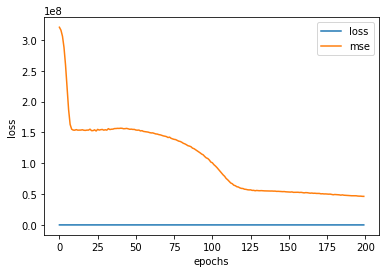

In [15]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

# Preprocessing data 
    1. normalization
    2. standardization

In [19]:
x.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0


<AxesSubplot:ylabel='Frequency'>

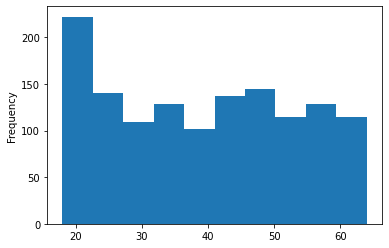

In [17]:
x['age'].plot(kind ='hist')

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
# minmax, onehotencoder 한번에 처리
ct = make_column_transformer((MinMaxScaler(), ['age','bmi','children']),
                            (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region']))

# Create x & y
x = insurance.drop('charges', axis = 1)
y = insurance['charges']

# train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization and onehotencoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [27]:
# What does our data look like now?
x_train_normal[0], x_train.shape, x_train_normal.shape

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]),
 (1070, 6),
 (1070, 11))

In [35]:
# Train for longer
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

history = insurance_model_4.fit(x_train_normal, y_train, epochs = 100)
# What is history?

Epoch 1/100
24/34 [====================>.........] - ETA: 0s - loss: 13335.8145 - mae: 13335.8145

2022-08-20 20:56:09.531932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 5ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13312.0225 - mae: 13312.0225
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13267.7920 - mae: 13267.7920
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13066.4531 - mae: 13066.4531
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1982 - mae: 12888.1982
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6592 - mae: 12644.6592
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12325.5557 - mae: 12325.5557
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.9766 - mae: 11

34/34 [==============================] - 0s 4ms/step - loss: 3673.9482 - mae: 3673.9482
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 3667.8472 - mae: 3667.8472
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 3664.5747 - mae: 3664.5747
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 3661.8604 - mae: 3661.8604
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 3660.3035 - mae: 3660.3035
Epoch 87/100
34/34 [==============================] - 0s 4ms/step - loss: 3657.5151 - mae: 3657.5151
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 3655.2222 - mae: 3655.2222
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 3653.8831 - mae: 3653.8831
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 3652.0188 - mae: 3652.0188
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 3649.0000 - mae: 3649.0000
Epo

In [36]:
insurance_model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 100)               1200      
                                                                 
 dense_24 (Dense)            (None, 10)                1010      
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [12]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 16ms/step - loss: 4924.3413 - mae: 4924.3413


2022-08-20 20:27:34.728174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[4924.34130859375, 4924.34130859375]

In [37]:
insurance_model_4.evaluate(x_test_normal, y_test)

# 30% reduction

9/9 [==============================] - 0s 4ms/step - loss: 3438.7864 - mae: 3438.7864


2022-08-20 20:56:34.080437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3438.786376953125, 3438.786376953125]